- Top 50 words
- Calculate times/ number of corrects
- 

### Set up

In [2]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from wordcloud import WordCloud
import collections 
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib
import time
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cluster import KMeans
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
plt.style.use('ggplot')

/Users/HUI/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pickle.load(open("All_email.txt","rb"))

### Seperate to training /test data

In [4]:
#Seperate to training data/test data
train, test = train_test_split(data, test_size = 0.3, random_state=0)

### Plots

In [5]:
year_count = []
for i in ['1999','2000','2001','2002','2003','2004','2005','2006','2007']:
          c=collections.Counter(data[data['Year']==i]['Classification'])
          year_count.append(c)
year_count = pd.DataFrame(year_count,index=['1999','2000','2001','2002','2003','2004','2005','2006','2007'])

year_rate = pd.DataFrame({'ham' : year_count['ham']/year_count.sum(axis=1),
                          'spam' : 1- year_count['ham']/year_count.sum(axis=1)})

year_rate

,ham,spam
1999,0.392410,0.607590
2000,0.749098,0.250902
2001,0.920896,0.079104
2002,0.668820,0.331180
2003,0.235116,0.764884
2004,0.044636,0.955364
2005,0.066356,0.933644
2006,0.309909,0.690091
2007,0.339796,0.660204


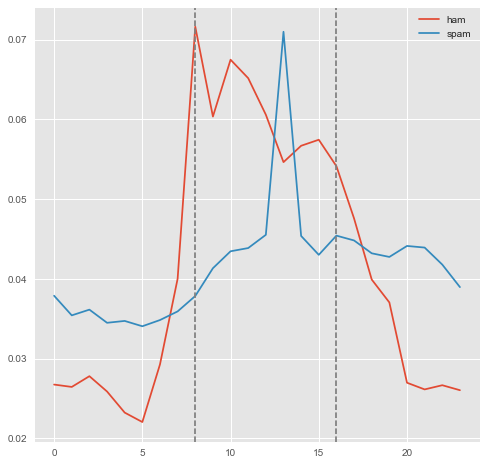

In [5]:
hour_count = []
hour  = ['00','01','02','03','04','05','06','07','08','09','10','11',
         '12','13','14','15','16','17','18','19','20','21','22','23']
for i in hour :
          c=collections.Counter(data[data['Hour']==i]['Classification'])
          hour_count.append(c)
hour_count = pd.DataFrame(hour_count,index=hour)



fig = plt.figure(figsize=[8,8])
line1, = plt.plot(hour_count['ham']/sum(hour_count['ham']), label='ham')
line2, = plt.plot(hour_count['spam']/sum(hour_count['spam']), label='spam')
plt.axvline(x=8,c='gray',linestyle='dashed')
plt.axvline(x=16,c='gray',linestyle='dashed')
plt.legend()
plt.show()

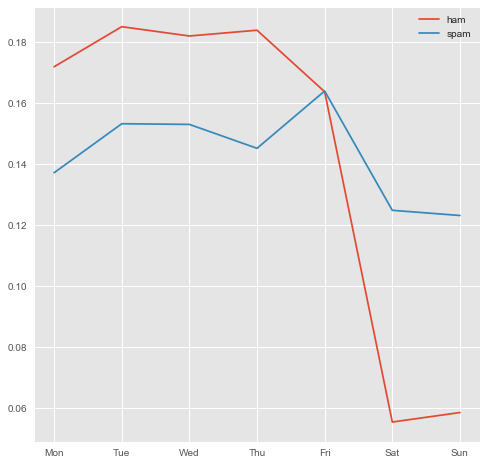

In [6]:
wd_count = []
wd  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in wd :
          c=collections.Counter(data[data['Weekday']==i]['Classification'])
          wd_count.append(c)
wd_count = pd.DataFrame(wd_count,index=range(7))

fig = plt.figure(figsize=[8,8])
line1, = plt.plot(wd_count['ham']/sum(wd_count['ham']), label='ham')
line2, = plt.plot(wd_count['spam']/sum(wd_count['spam']), label='spam')
plt.xticks(range(7),wd)
plt.legend()
plt.show()

### Feature Engineering

In [6]:
#tfidf(original,bi,tri)
count = CountVectorizer(ngram_range=(1,1),stop_words='english',analyzer='word')
count_bi = CountVectorizer(ngram_range=(2,2),stop_words='english',analyzer='word')
count_tri = CountVectorizer(ngram_range=(3,3),stop_words='english',analyzer='word')

X_train_counts = count.fit_transform(train['Content'])
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
tfidf_transformer = TfidfTransformer()

X_train_tf = tf_transformer.transform(X_train_counts)
X_test_counts = count.transform(test['Content'])
X_test_tf = tf_transformer.transform(X_test_counts)

c = collections.Counter()
c.update(data['Classification'])
pd.DataFrame({'ham': c['ham'],'spam':c['spam']},index=[0])

,ham,spam
0,60951,98930


In [7]:
#1:spam; 0:ham
y_train = train['Classification']
y_train  = (y_train  == 'spam')*1
y_test = test['Classification']
y_test = (y_test  == 'spam')*1

### Top 50 words per 

- Array problems
- Keep run

In [60]:
data_clean=pickle.load(open("data_clean.txt","rb"))

def topwords(n=50,year='1999',data=data_clean,cla='spam'):
	Spam = data[data['Classification']==cla]
	counts_vec = count.fit_transform(Spam[Spam['Year']==year]['clean_emails'])
	sum_counts = np.array(counts_vec.sum(axis=0))

	feature_array = np.array(count.get_feature_names())
	counts_sorting = np.argsort(sum_counts).flatten()[::-1]
	top_n = feature_array[counts_sorting][:n]
	#np.set_printoptions(threshold='nan')
	return top_n 

topwords(20,'1999')

for i in ['1999','2000','2001','2002','2003','2004','2005','2006','2007']:
	print topwords(50,i)

[u'price' u'company' u'info' u'gold' u'microsoft' u'adobe' u'windows'
 u'office' u'save' u'xp' u'campaign' u'professional' u'china' u'website'
 u'add' u'rating' u'hi' u'stock' u'corp' u'effects' u'product' u'ms'
 u'professionaladobe' u'proms' u'oil' u'world' u'news' u'day' u'like'
 u'hoodia' u'ra' u'mm' u'today' u'great' u'market' u'retail' u'development'
 u'time' u'reviews' u'gas' u'big' u'said' u'new' u'energy' u'days' u'cart'
 u'reviewsretail' u'number' u'cantex' u'week']
[u'price' u'company' u'info' u'gold' u'adobe' u'windows' u'microsoft'
 u'campaign' u'hi' u'office' u'stock' u'save' u'website' u'china'
 u'professional' u'xp' u'effects' u'world' u'add' u'news' u'day' u'like'
 u'oil' u'said' u'time' u'hoodia' u'new' u'rating' u'corp' u'market' u'mm'
 u'product' u'ra' u'gas' u'number' u'big' u'week' u'com' u'today' u'used'
 u'ms' u'professionaladobe' u'proms' u'hereopt' u'known' u'make' u'great'
 u'development' u'energy' u'offer']
[u'price' u'free' u'com' u'company' u'save' u'websit

In [61]:
pd.DataFrame(topwords(20,'1999'))

,0
0,price
1,company
2,info
3,gold
4,microsoft
5,adobe
6,windows
7,office
8,save
9,xp


### Data Reduction (SVD/LSA)

- Reduce Tfidf matrix to dim=100 LSA matrix

In [52]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(100, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_train_tf)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

dtm_lsa_test = lsa.transform(X_test_tf)
dtm_lsa_test = Normalizer(copy=False).transform(dtm_lsa_test)

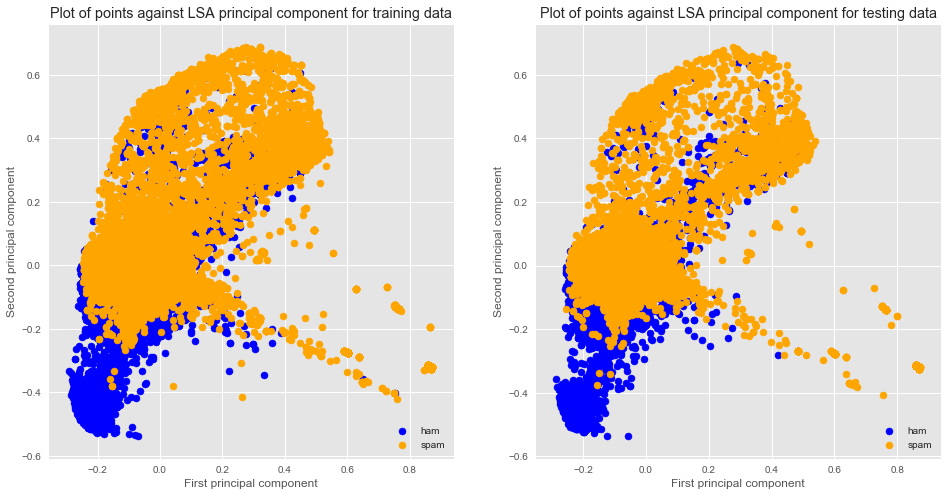

In [55]:
f, axarr = plt.subplots(1,2,figsize=(16,8))
colors=['blue','orange']
axarr[0].scatter(dtm_lsa[[i for i, x in enumerate(y_train==0) if x],1],
                 dtm_lsa[[i for i, x in enumerate(y_train==0) if x],2],
                 color = 'blue',label ='ham')

axarr[0].scatter(dtm_lsa[[i for i, x in enumerate(y_train==1) if x],1],
                 dtm_lsa[[i for i, x in enumerate(y_train==1) if x],2],
                 color = 'orange',label ='spam')

axarr[0].set_ylabel('Second principal component')
axarr[0].set_xlabel('First principal component')
axarr[0].legend(loc = 'lower right')
axarr[0].set_title('Plot of points against LSA principal component for training data')


axarr[1].scatter(dtm_lsa_test[[i for i, x in enumerate(y_test==0) if x],1],
                 dtm_lsa_test[[i for i, x in enumerate(y_test==0) if x],2],
                 color = 'blue',label ='ham')

axarr[1].scatter(dtm_lsa_test[[i for i, x in enumerate(y_test==1) if x],1],
                 dtm_lsa_test[[i for i, x in enumerate(y_test==1) if x],2],
                 color = 'orange',label ='spam')
axarr[1].set_xlabel('First principal component')
axarr[1].set_ylabel('Second principal component')
axarr[1].set_title('Plot of points against LSA principal component for testing data')
axarr[1].legend(loc="lower right")

plt.show()

### LinearSVMs

In [16]:
text_clf = Pipeline([('lsa', TruncatedSVD(100, algorithm = 'arpack')),
                     ('clf', LinearSVC(C=1))])
_ = text_clf.fit(X_train_tf,y_train)
predicted = text_clf.predict(X_test_tf)


np.mean(predicted == y_test) 

0.94583550505576985

In [54]:
confusion_matrix(predicted, y_test)

array([[16667,   944],
       [ 1654, 28700]])

In [158]:
parameters = {'clf__C': [0.001,0.01,0.05,0.1,0.2,0.5,0.7,1]}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [58]:
#Work on the server tune C = 1
# gs_clf = gs_clf.fit(X_train_tf, y_train)
# best_parameters = gs_clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))